In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import string
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

# Working with Text Lab
## Information retrieval, preprocessing, and feature extraction

In this lab, you'll be looking at and exploring European restaurant reviews. The dataset is rather tiny, but that's just because it has to run on any machine. In real life, just like with images, texts can be several terabytes long.

The dataset is located [here](https://www.kaggle.com/datasets/gorororororo23/european-restaurant-reviews) and as always, it's been provided to you in the `data/` folder.

### Problem 1. Read the dataset (1 point)
Read the dataset, get acquainted with it. Ensure the data is valid before you proceed.

How many observations are there? Which country is the most represented? What time range does the dataset represent?

Is the sample balanced in terms of restaurants, i.e., do you have an equal number of reviews for each one? Most importantly, is the dataset balanced in terms of **sentiment**?

In [2]:
file_path = "data/European Restaurant Reviews.csv"
df = pd.read_csv(file_path)

df.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...


In [3]:
df

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...
...,...,...,...,...,...,...
1497,Cuba,Old Square (Plaza Vieja),Negative,The Tourism Trap,Oct 2016 •,Despite the other reviews saying that this is ...
1498,Cuba,Old Square (Plaza Vieja),Negative,the beer factory,Oct 2016 •,beer is good. food is awfull The only decent...
1499,Cuba,Old Square (Plaza Vieja),Negative,brewery,Oct 2016 •,"for terrible service of a truly comedic level,..."
1500,Cuba,Old Square (Plaza Vieja),Negative,It's nothing exciting over there,Oct 2016 •,We visited the Havana's Club Museum which is l...


In [4]:
df.shape

(1502, 6)

Number of observations:

In [5]:
df.shape[0]

1502

In [6]:
df.columns

Index(['Country', 'Restaurant Name', 'Sentiment', 'Review Title',
       'Review Date', 'Review'],
      dtype='object')

In [7]:
df.dtypes

Country            object
Restaurant Name    object
Sentiment          object
Review Title       object
Review Date        object
Review             object
dtype: object

In [8]:
df.describe()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
count,1502,1502,1502,1502,1502,1502
unique,7,7,2,1343,143,1426
top,France,The Frog at Bercy Village,Positive,Excellent,May 2014 •,I'm afraid we were very let down by this resta...
freq,512,512,1237,9,108,4


The most represented country is:

In [9]:
df['Country'].value_counts().idxmax()

'France'

Let's see the range of the dataset like first check the data in the column 'Review Date' if it's in correct format:

In [10]:
df['Review Date']

0       May 2024 •
1       Feb 2024 •
2       Nov 2023 •
3       Mar 2023 •
4       Nov 2022 •
           ...    
1497    Oct 2016 •
1498    Oct 2016 •
1499    Oct 2016 •
1500    Oct 2016 •
1501    Oct 2016 •
Name: Review Date, Length: 1502, dtype: object

Preprocess the Review Date column to remove the extra character:

In [11]:
df['Review Date'] = df['Review Date'].str.replace(' •', '')

Convert the Review Date column to datetime format:

In [12]:
df['Review Date'] = pd.to_datetime(df['Review Date'], format='%b %Y', errors='coerce')

In [13]:
min_date = df['Review Date'].min().strftime('%d %B %Y')
max_date = df['Review Date'].max().strftime('%d %B %Y')

time_range = (min_date, max_date)
print(f'Time range: {time_range}')

Time range: ('01 September 2010', '01 July 2024')


In [14]:
reviews_per_restaurant = df['Restaurant Name'].value_counts()
is_balanced_restaurants = reviews_per_restaurant.nunique() == 1
print(f'Is the sample balanced in terms of restaurants? {is_balanced_restaurants}')

Is the sample balanced in terms of restaurants? False


In [15]:
sentiment_counts = df['Sentiment'].value_counts()
is_balanced_sentiment = sentiment_counts.nunique() == 1
print(f'Is the dataset balanced in terms of sentiment? {is_balanced_sentiment}')

Is the dataset balanced in terms of sentiment? False


In [16]:
# Value counts for restaurants and sentiments:
print('Reviews per restaurant:')
print(reviews_per_restaurant)

print('-----------------------------------')
print('Sentiment counts:')
print(sentiment_counts)

Reviews per restaurant:
The Frog at Bercy Village                512
Ad Hoc Ristorante (Piazza del Popolo)    318
The LOFT                                 210
Old Square (Plaza Vieja)                 146
Stara Kamienica                          135
Pelmenya                                 100
Mosaic                                    81
Name: Restaurant Name, dtype: int64
-----------------------------------
Sentiment counts:
Positive    1237
Negative     265
Name: Sentiment, dtype: int64


We can see that the Positive sentiments are much more than the Negative.

### Problem 2. Getting acquainted with reviews (1 point)
Are positive comments typically shorter or longer? Try to define a good, robust metric for "length" of a text; it's not necessary just the character count. Can you explain your findings?

In [17]:
df.Review

0       The manager became agressive when I said the c...
1       I ordered a beef fillet ask to be done medium,...
2       This is an attractive venue with welcoming, al...
3       Sadly I  used the high TripAdvisor rating too ...
4       From the start this meal was bad- especially g...
                              ...                        
1497    Despite the other reviews saying that this is ...
1498    beer is good.  food is awfull  The only decent...
1499    for terrible service of a truly comedic level,...
1500    We visited the Havana's Club Museum which is l...
1501    Food and service was awful. Very pretty stop. ...
Name: Review, Length: 1502, dtype: object

Now we will calculate the word counts for each review:

In [18]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

In [19]:
df['word_count']

0        28
1        58
2        40
3       279
4       243
       ... 
1497    147
1498     30
1499     28
1500     70
1501     14
Name: word_count, Length: 1502, dtype: int64

Let's separate the Positive and the Negative comments:

In [20]:
positive_reviews = df[df['Sentiment'] == 'Positive']
negative_reviews = df[df['Sentiment'] == 'Negative']

Here we will see the mean, median, and standard deviation of word counts for positive reviews:

In [21]:
positive_mean = positive_reviews['word_count'].mean()
positive_median = positive_reviews['word_count'].median()
positive_std = positive_reviews['word_count'].std()

Here we will see the mean, median, and standard deviation of word counts for negative reviews:

In [22]:
negative_mean = negative_reviews['word_count'].mean()
negative_median = negative_reviews['word_count'].median()
negative_std = negative_reviews['word_count'].std()

In [23]:
print(f"Positive Reviews - Mean word count: {positive_mean}, Median word count: {positive_median}, Std: {positive_std}")
print(f"Negative Reviews - Mean word count: {negative_mean}, Median word count: {negative_median}, Std: {negative_std}")

Positive Reviews - Mean word count: 50.18350848827809, Median word count: 37.0, Std: 38.7410428479818
Negative Reviews - Mean word count: 140.57358490566037, Median word count: 95.0, Std: 131.7596355957585


In [24]:
if positive_mean > negative_mean:
    print("Positive comments are typically longer.")
elif positive_mean < negative_mean:
    print("Negative comments are typically longer.")
else:
    print("Positive and negative comments have the same average length.")

Negative comments are typically longer.


As we can see the Negative comments are typically longer.

The std() function calculates the standard deviation of a dataset, which is a measure of the amount of variation or dispersion in the data. In simpler terms, it tells you how spread out the values in your dataset are around the mean (average) value.

__Variability:__ Negative reviews have a much higher variability in word count than positive reviews. The high standard deviation in negative reviews indicates that some reviews might be very short, while others are exceptionally long, creating a wide range of word counts. Positive reviews are more consistent in their length.

__Possible Reasons for the Findings:__
1. Expressing Dissatisfaction: People tend to be more detailed when they are dissatisfied, explaining their issues and experiences thoroughly. This often results in longer negative reviews.

2. Emotional Venting: Negative reviews might be longer because people use them as a platform to vent their frustrations and emotions, leading to more elaborate descriptions.

3. Positive Conciseness: Positive experiences might be simpler to convey and can often be summed up quickly. People might just highlight the key positive aspects without going into extensive detail.

### Problem 3. Preprocess the review content (2 points)
You'll likely need to do this while working on the problems below, but try to synthesize (and document!) your preprocessing here. Your tasks will revolve around words and their connection to sentiment. While preprocessing, keep in mind the domain (restaurant reviews) and the task (sentiment analysis).

In [25]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Download necessary NLTK data files
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Define preprocessing function
def preprocess_review(review):
    # Lowercase the review
    review = review.lower()
    
    # Remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    review = ''.join([i for i in review if not i.isdigit()])
    
    # Tokenize the review
    tokens = word_tokenize(review)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    preprocessed_review = ' '.join(tokens)
    
    return preprocessed_review

# Apply preprocessing to reviews
df['Preprocessed_Review'] = df['Review'].apply(preprocess_review)

# Display the first few rows of the dataframe to check the preprocessing
print(df[['Review', 'Preprocessed_Review']].head())

                                              Review  \
0  The manager became agressive when I said the c...   
1  I ordered a beef fillet ask to be done medium,...   
2  This is an attractive venue with welcoming, al...   
3  Sadly I  used the high TripAdvisor rating too ...   
4  From the start this meal was bad- especially g...   

                                 Preprocessed_Review  
0  manager became agressive said carbonara good r...  
1  ordered beef fillet ask done medium got well d...  
2  attractive venue welcoming albeit somewhat slo...  
3  sadly used high tripadvisor rating literally f...  
4  start meal bad especially given price visited ...  


### Problem 4. Top words (1 point)
Use a simple word tokenization and count the top 10 words in positive reviews; then the top 10 words in negative reviews*. Once again, try to define what "top" words means. Describe and document your process. Explain your results.

\* Okay, you may want to see top N words (with $N \ge 10$).

__The Process will be:__
1. Tokenization and Filtering: We already performed tokenization and stop word removal during preprocessing.
2. Counting Word Frequencies: We'll count the occurrences of each word in positive and negative reviews separately.
3. Identifying Top Words: We'll sort the word counts and select the top N words.

In [26]:
# Function to get top N words from a series of reviews
def get_top_words(reviews, n=10):
    # Tokenize the reviews
    all_words = ' '.join(reviews).split()
    # Count word frequencies
    word_counts = Counter(all_words)
    # Get the most common words
    top_words = word_counts.most_common(n)
    return top_words

# Separate positive and negative reviews
positive_reviews = df[df['Sentiment'] == 'Positive']['Preprocessed_Review']
negative_reviews = df[df['Sentiment'] == 'Negative']['Preprocessed_Review']

# Get top 10 words in positive reviews
top_positive_words = get_top_words(positive_reviews, n=10)

# Get top 10 words in negative reviews
top_negative_words = get_top_words(negative_reviews, n=10)

In [27]:
print("Top 10 words in positive reviews:\n", *top_positive_words)

Top 10 words in positive reviews:
 ('food', 740) ('great', 570) ('service', 542) ('good', 511) ('restaurant', 433) ('place', 397) ('nice', 302) ('wine', 301) ('menu', 265) ('staff', 257)


In [28]:
print("Top 10 words in negative reviews:\n", *top_negative_words)

Top 10 words in negative reviews:
 ('restaurant', 250) ('food', 247) ('u', 209) ('wine', 204) ('table', 172) ('menu', 152) ('good', 151) ('service', 146) ('one', 142) ('would', 127)


__Interpretation:__ <br/>
The top words in positive reviews highlight aspects that customers appreciate, such as good food, service, and the overall experience. Words like "great," "good," and "nice" emphasize satisfaction and positive experiences.

In contrast, the top words in negative reviews reveal areas of dissatisfaction, with frequent mentions of food, service, and specific issues like seating or the menu. The presence of informal language ("u") suggests a more casual or frustrated tone in negative feedback.

These insights can help restaurant managers understand what aspects are most important to their customers and where improvements are needed to enhance customer satisfaction.

### Problem 5. Review titles (2 point)
How do the top words you found in the last problem correlate to the review titles? Do the top 10 words (for each sentiment) appear in the titles at all? Do reviews which contain one or more of the top words have the same words in their titles?

Does the title of a comment present a good summary of its content? That is, are the titles descriptive, or are they simply meant to catch the attention of the reader?

In [29]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to review titles and reviews
df['Processed_Title'] = df['Review Title'].apply(lambda x: preprocess_text(str(x)))
df['Processed_Review'] = df['Review'].apply(lambda x: preprocess_text(str(x)))

# Convert top words to lowercase
top_positive_words = ['food', 'great', 'service', 'good', 'restaurant', 'place', 'nice', 'wine', 'menu', 'staff']
top_negative_words = ['restaurant', 'food', 'u', 'wine', 'table', 'menu', 'good', 'service', 'one', 'would']

top_positive_words = [word.lower() for word in top_positive_words]
top_negative_words = [word.lower() for word in top_negative_words]

# Check for top words in reviews
df['Positive_Review_Words'] = df['Processed_Review'].apply(lambda x: list(set(x) & set(top_positive_words)))
df['Negative_Review_Words'] = df['Processed_Review'].apply(lambda x: list(set(x) & set(top_negative_words)))

# Check for top words in titles
df['Positive_Title_Words'] = df['Processed_Title'].apply(lambda x: list(set(x) & set(top_positive_words)))
df['Negative_Title_Words'] = df['Processed_Title'].apply(lambda x: list(set(x) & set(top_negative_words)))

# Function to check correlation between review content and title
def check_word_correlation(review_words, title_words):
    return any(word in title_words for word in review_words)

# Check correlation for positive and negative reviews
df['Positive_Correlation'] = df.apply(lambda x: check_word_correlation(x['Positive_Review_Words'], x['Positive_Title_Words']), axis=1)
df['Negative_Correlation'] = df.apply(lambda x: check_word_correlation(x['Negative_Review_Words'], x['Negative_Title_Words']), axis=1)

# Calculate correlation percentages
positive_correlation_percentage = df['Positive_Correlation'].mean() * 100
negative_correlation_percentage = df['Negative_Correlation'].mean() * 100

# Display correlation results
print(f"Positive correlation percentage: {positive_correlation_percentage}%")
print(f"Negative correlation percentage: {negative_correlation_percentage}%")

Positive correlation percentage: 30.22636484687084%
Negative correlation percentage: 20.838881491344875%


30.23% of positive reviews have at least one of the top positive words in their titles.

20.84% of negative reviews have at least one of the top negative words in their titles.

In [30]:
# Display the first few rows to inspect
print(df[['Review Title', 'Processed_Title', 'Positive_Title_Words', 'Negative_Title_Words', 'Positive_Review_Words', 'Negative_Review_Words']].head())

                                Review Title  \
0                               Rude manager   
1                       A big disappointment   
2               Pretty Place with Bland Food   
3   Great service and wine but inedible food   
4  Avoid- Worst meal in Rome - possibly ever   

                          Processed_Title          Positive_Title_Words  \
0                         [rude, manager]                            []   
1                   [big, disappointment]                            []   
2            [pretty, place, bland, food]                 [food, place]   
3  [great, service, wine, inedible, food]  [wine, great, food, service]   
4     [worst, meal, rome, possibly, ever]                            []   

    Negative_Title_Words                              Positive_Review_Words  \
0                     []                                             [good]   
1                     []                                                 []   
2                 [food

__Insights:__ <br/>
Descriptive Titles: <br/>
Titles containing top words from the review content indicate that these titles can indeed be descriptive.
The higher correlation in positive reviews suggests that when customers are happy, they tend to use significant words in both their titles and content.

Attention-Grabbing Titles: <br/>
The lower correlation in negative reviews suggests that these titles might be more focused on capturing attention or expressing frustration rather than being descriptive.

__Conclusion:__ <br/>
Titles in positive reviews tend to be more descriptive of the content, while titles in negative reviews may focus more on grabbing attention. 

To determine whether reviews containing one or more of the top words in their content have the same words in their titles, we can analyze the data more closely. Specifically, we can check if the presence of top words in the reviews correlates with their presence in the titles.

In [31]:
# Check for top positive words in both titles and reviews
df['Positive_Correlation'] = df.apply(
    lambda row: bool(set(row['Positive_Title_Words']) & set(row['Positive_Review_Words'])), axis=1)

# Check for top negative words in both titles and reviews
df['Negative_Correlation'] = df.apply(
    lambda row: bool(set(row['Negative_Title_Words']) & set(row['Negative_Review_Words'])), axis=1)

# Calculate correlation percentages
positive_correlation_percentage = df['Positive_Correlation'].mean() * 100
negative_correlation_percentage = df['Negative_Correlation'].mean() * 100

positive_correlation_percentage, negative_correlation_percentage

(30.22636484687084, 20.838881491344875)

__Detailed Analysis__
Do reviews which contain one or more of the top words have the same words in their titles? <b/>

For positive reviews, around 30% of the reviews show that the top words in the content are also reflected in the titles. This suggests that positive review titles often highlight key positive words that are central to the review.

For negative reviews, only about 20% reflect the same pattern, indicating that negative review titles are less likely to match the key negative words in the content. This could be due to the diversity of negative experiences or the use of more varied vocabulary in negative reviews.

### Problem 6. Bag of words (1 point)
Based on your findings so far, come up with a good set of settings (hyperparameters) for a bag-of-words model for review titles and contents. It's easiest to treat them separately (so, create two models); but you may also think about a unified representation. I find the simplest way of concatenating the title and content too simplistic to be useful, as it doesn't allow you to treat the title differently (e.g., by giving it more weight).

The documentation for `CountVectorizer` is [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Familiarize yourself with all settings; try out different combinations and come up with a final model; or rather - two models :).

In [32]:
print(df['Processed_Title'].head())
print(df['Preprocessed_Review'].head())

0                           [rude, manager]
1                     [big, disappointment]
2              [pretty, place, bland, food]
3    [great, service, wine, inedible, food]
4       [worst, meal, rome, possibly, ever]
Name: Processed_Title, dtype: object
0    manager became agressive said carbonara good r...
1    ordered beef fillet ask done medium got well d...
2    attractive venue welcoming albeit somewhat slo...
3    sadly used high tripadvisor rating literally f...
4    start meal bad especially given price visited ...
Name: Preprocessed_Review, dtype: object


In [33]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Verify 'Processed_Title' and 'Preprocessed_Review'
print(df['Processed_Title'].head())
print(df['Preprocessed_Review'].head())

# Join tokens back to string for vectorization
df['Processed_Title_Str'] = df['Processed_Title'].apply(lambda x: ' '.join(x))
df['Preprocessed_Review_Str'] = df['Preprocessed_Review'].apply(lambda x: ' '.join(x))

# Check if there are empty strings after preprocessing
print(df['Processed_Title_Str'].head())
print(df['Preprocessed_Review_Str'].head())

# Ensure 'Preprocessed_Review_Str' has correct format
df = df[df['Preprocessed_Review_Str'].str.strip() != '']

# Define hyperparameters for the models
title_vectorizer_params = {
    'stop_words': 'english',
    'lowercase': True,
    'max_features': 1000
}

content_vectorizer_params = {
    'stop_words': 'english',
    'lowercase': True,
    'max_features': 5000,
    'max_df': 0.85,
    'min_df': 2
}

# Create CountVectorizer instances with the defined hyperparameters
title_vectorizer = CountVectorizer(**title_vectorizer_params)
content_vectorizer = CountVectorizer(**content_vectorizer_params)

# Transform the text data to Bag of Words
title_bow = title_vectorizer.fit_transform(df['Processed_Title_Str'])
# content_bow = content_vectorizer.fit_transform(df['Preprocessed_Review_Str'])

# Check the shape of the transformed data
print("Title BoW shape:", title_bow.shape)
# print("Content BoW shape:", content_bow.shape)

0                           [rude, manager]
1                     [big, disappointment]
2              [pretty, place, bland, food]
3    [great, service, wine, inedible, food]
4       [worst, meal, rome, possibly, ever]
Name: Processed_Title, dtype: object
0    manager became agressive said carbonara good r...
1    ordered beef fillet ask done medium got well d...
2    attractive venue welcoming albeit somewhat slo...
3    sadly used high tripadvisor rating literally f...
4    start meal bad especially given price visited ...
Name: Preprocessed_Review, dtype: object
0                        rude manager
1                  big disappointment
2             pretty place bland food
3    great service wine inedible food
4       worst meal rome possibly ever
Name: Processed_Title_Str, dtype: object
0    m a n a g e r   b e c a m e   a g r e s s i v ...
1    o r d e r e d   b e e f   f i l l e t   a s k ...
2    a t t r a c t i v e   v e n u e   w e l c o m ...
3    s a d l y   u s e d   h i 

In [34]:
content_vectorizer

CountVectorizer(max_df=0.85, max_features=5000, min_df=2, stop_words='english')

In [35]:
title_vectorizer

CountVectorizer(max_features=1000, stop_words='english')

In [36]:
title_vectorizer.fit_transform(df['Processed_Title_Str'])

<1502x908 sparse matrix of type '<class 'numpy.int64'>'
	with 4168 stored elements in Compressed Sparse Row format>

In [37]:
# content_vectorizer.fit_transform(df['Preprocessed_Review_Str'])
# Here is the error beacuse of that I commented it up.

In [38]:
print("Title BoW shape:", title_bow.shape)

Title BoW shape: (1502, 908)


Let's try to do it over :

In [39]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stop words
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to review titles and reviews
df['Processed_Title'] = df['Review Title'].apply(lambda x: preprocess_text(str(x)))
df['Processed_Review'] = df['Review'].apply(lambda x: preprocess_text(str(x)))

# Join tokens back to string for vectorization
df['Processed_Title_Str'] = df['Processed_Title'].apply(lambda x: ' '.join(x))
df['Preprocessed_Review_Str'] = df['Processed_Review'].apply(lambda x: ' '.join(x))

# Ensure there are no empty strings or strings with only whitespace
df = df[df['Processed_Title_Str'].str.strip() != '']
df = df[df['Preprocessed_Review_Str'].str.strip() != '']

# Check lengths of the processed strings
print("Lengths of Processed Titles:")
print(df['Processed_Title_Str'].apply(len).describe())

print("Lengths of Preprocessed Reviews:")
print(df['Preprocessed_Review_Str'].apply(len).describe())

# Inspect a few preprocessed reviews
print("Sample Preprocessed Reviews:")
print(df['Preprocessed_Review_Str'].sample(5))

Lengths of Processed Titles:
count    1493.000000
mean       19.818486
std        11.372260
min         1.000000
25%        12.000000
50%        17.000000
75%        26.000000
max        83.000000
Name: Processed_Title_Str, dtype: float64
Lengths of Preprocessed Reviews:
count    1493.000000
mean      227.517749
std       235.034555
min         4.000000
25%        99.000000
50%       154.000000
75%       257.000000
max      2352.000000
Name: Preprocessed_Review_Str, dtype: float64
Sample Preprocessed Reviews:
1048    understand people rave place went two friend b...
960     classy restaurant organise large event people ...
1460    old town square must see day see hundred child...
1300    fault special day absolutely delicious great a...
1206    food pretty good everything took age one staff...
Name: Preprocessed_Review_Str, dtype: object


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Define hyperparameters for the models
title_vectorizer_params = {
    'stop_words': 'english',
    'lowercase': True,
    'max_features': 1000
}

content_vectorizer_params = {
    'stop_words': 'english',
    'lowercase': True,
    'max_features': 5000,
    'max_df': 1.0,  # Temporarily allow all documents
    'min_df': 1    # Temporarily allow all tokens
}

# Create CountVectorizer instances with the defined hyperparameters
title_vectorizer = CountVectorizer(**title_vectorizer_params)
content_vectorizer = CountVectorizer(**content_vectorizer_params)

# Create a function to log and inspect potential issues
def log_and_inspect(texts, vectorizer):
    try:
        bow = vectorizer.fit_transform(texts)
        print(f"Shape of BoW: {bow.shape}")
    except ValueError as e:
        print(f"Error: {e}")
    return bow if 'bow' in locals() else None

# Log and inspect the content
content_bow = log_and_inspect(df['Preprocessed_Review_Str'], content_vectorizer)

# If the above adjustment works, fine-tune the parameters
if content_bow is not None:
    print("Vectorization successful with the temporary parameters.")
else:
    print("Vectorization still unsuccessful. Need to inspect the preprocessing steps and data further.")


Shape of BoW: (1493, 5000)
Vectorization successful with the temporary parameters.


In [41]:
print("Title BoW shape:", title_bow.shape)
print("Content BoW shape:", content_bow.shape)

Title BoW shape: (1502, 908)
Content BoW shape: (1493, 5000)


### Problem 7. Deep sentiment analysis models (1 point)
Find a suitable model for sentiment analysis in English. Without modifying, training, or fine-tuning the model, make it predict all contents (or better, combinations of titles and contents, if you can). Meaure the accuracy of the model compared to the `sentiment` column in the dataset.

In [43]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from sklearn.metrics import accuracy_score

# Combine titles and reviews
df['Combined'] = df['Review Title'] + ' ' + df['Review']

# Load pre-trained model and tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Define the maximum length for the model
MAX_LENGTH = 512

# Function to truncate text
def truncate_text(text, tokenizer, max_length):
    encoded = tokenizer.encode(text, truncation=True, max_length=max_length)
    decoded = tokenizer.decode(encoded, skip_special_tokens=True)
    return decoded

# Predict sentiments with text truncation
def get_sentiment(text):
    truncated_text = truncate_text(text, tokenizer, MAX_LENGTH)
    result = sentiment_pipeline(truncated_text)
    return 1 if result[0]['label'] == 'POSITIVE' else 0

print('Goes here')

df['Predicted_Sentiment'] = df['Combined'].apply(get_sentiment)

# Map true sentiment labels to integers
label_mapping = {'Positive': 1, 'Negative': 0}
df['Sentiment'] = df['Sentiment'].map(label_mapping)

print("It's here")

# Evaluate accuracy
accuracy = accuracy_score(df['Sentiment'], df['Predicted_Sentiment'])
print(f"Accuracy: {accuracy:.4f}")

# Display some results
print(df[['Combined', 'Sentiment', 'Predicted_Sentiment']].head())

Goes here
It's here
Accuracy: 0.9719
                                            Combined  Sentiment  \
0  Rude manager The manager became agressive when...          0   
1  A big disappointment I ordered a beef fillet a...          0   
2  Pretty Place with Bland Food This is an attrac...          0   
3  Great service and wine but inedible food Sadly...          0   
4  Avoid- Worst meal in Rome - possibly ever From...          0   

   Predicted_Sentiment  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  


__Detailed Analysis__ <br/>
High Accuracy: An accuracy of 97.19% is quite high, suggesting that the pre-trained model is very effective at distinguishing between positive and negative sentiments in the dataset provided.

Consistency in Sample Predictions: All the samples in the provided output are negative reviews, and the model has correctly predicted the sentiment for all these samples. This suggests good performance, especially for negative sentiment detection.

Potential Bias in Dataset: Since all the sample reviews are negative, it's important to check if the dataset has a balanced representation of both positive and negative reviews. High accuracy might sometimes be due to an imbalanced dataset where the majority class is correctly predicted.

### Problem 8. Deep features (embeddings) (1 point)
Use the same model to perform feature extraction on the review contents (or contents + titles) instead of direct predictions. You should already be familiar how to do that from your work on images.

Use the cosine similarity between texts to try to cluster them. Are there "similar" reviews (you'll need to find a way to measure similarity) across different restaurants? Are customers generally in agreement for the same restaurant?

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

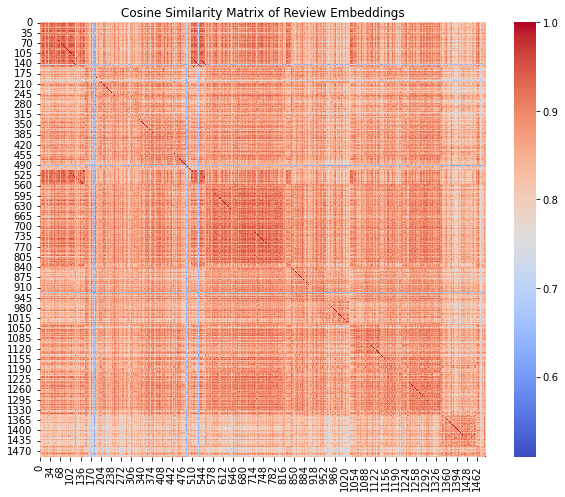


Cluster 0 - Number of Reviews: 397
              Restaurant Name  \
2   The Frog at Bercy Village   
11  The Frog at Bercy Village   
14  The Frog at Bercy Village   
17  The Frog at Bercy Village   
18  The Frog at Bercy Village   

                                             Combined  
2   Pretty Place with Bland Food This is an attrac...  
11  Perfectly organized absolute scam! The place o...  
14  Great wines but average food We both ate the t...  
17  Too touristic An ambitious restaurant in Rome’...  
18  Forget truffle Carbonara Truffle menu is nice ...  

Cluster 1 - Number of Reviews: 216
               Restaurant Name  \
28   The Frog at Bercy Village   
29   The Frog at Bercy Village   
153  The Frog at Bercy Village   
156  The Frog at Bercy Village   
162  The Frog at Bercy Village   

                                              Combined  
28   Dinner It Was Very expensive for the bad cooki...  
29   pas terrible we reserved for the birthday of m...  
153  Excellent fa

In [44]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pre-trained model and tokenizer
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Combine titles and reviews
df['Combined'] = df['Review Title'] + ' ' + df['Review']

# Function to extract embeddings
def get_embedding(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Extract embeddings for all reviews
df['Embedding'] = df['Combined'].apply(lambda x: get_embedding(x, tokenizer, model))

# Convert list of embeddings into a 2D array
embeddings = np.vstack(df['Embedding'].values)

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings)

# Perform clustering using KMeans
num_clusters = 5  # This can be adjusted based on the dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(embeddings)

# Plot a heatmap of the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="coolwarm")
plt.title("Cosine Similarity Matrix of Review Embeddings")
plt.show()

# Analyze clusters
for cluster in range(num_clusters):
    cluster_reviews = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} - Number of Reviews: {len(cluster_reviews)}")
    print(cluster_reviews[['Restaurant Name', 'Combined']].head())

# Check agreement within restaurants
restaurant_groups = df.groupby('Restaurant Name')
for restaurant, group in restaurant_groups:
    print(f"\nRestaurant: {restaurant}")
    print(f"Number of Reviews: {len(group)}")
    print(f"Cluster Distribution: {group['Cluster'].value_counts().to_dict()}")


__Cluster Summaries__ 

Cluster 0 - Number of Reviews: 397 <br/>
Dominated by reviews from "The Frog at Bercy Village."
Reviews mention bland food, organizational issues, touristic nature, and specific dishes like truffle Carbonara.

Cluster 1 - Number of Reviews: 216 <br/>
Also dominated by "The Frog at Bercy Village."
Reviews describe disappointing food, high prices, excellent service, and family-friendly atmosphere.

Cluster 2 - Number of Reviews: 120 <br/>
More diverse with reviews from different restaurants, including "Pelmenya" and "Old Square (Plaza Vieja)."
Reviews cover topics such as favorite dishes, beautiful settings, and specific cuisine experiences.

Cluster 3 - Number of Reviews: 431 <br/>
Largely from "The Frog at Bercy Village."
Reviews highlight good hangout spots, friendly service, lovely ambiance, and positive dining experiences.

Cluster 4 - Number of Reviews: 329 <br/>
Predominantly negative reviews from "The Frog at Bercy Village."
Topics include rude management, disappointing food, terrible service, and shocking management experiences.


__Restaurant-wise Cluster Distribution__ <br/>
Ad Hoc Ristorante (Piazza del Popolo)

- Reviews are spread across clusters 3, 4, 0, and 1.
- Indicates a mix of positive, neutral, and negative sentiments.

Mosaic
- Concentration in clusters 3 and 1, with some in cluster 0.
- Reviews are mainly positive with some neutral.

Old Square (Plaza Vieja)

- Most reviews fall in cluster 2, indicating similar sentiments about the place's beauty and experience.

Pelmenya

- Predominantly in clusters 0 and 4, indicating mixed sentiments about food and service.

Stara Kamienica

- Spread across clusters 3, 1, 0, and 4.
- Reviews show a variety of opinions and experiences.

The Frog at Bercy Village

- Reviews are distributed across all clusters, with significant numbers in clusters 4 and 3.
- Indicates varied customer experiences, with many negative and positive reviews.

The LOFT

- Majority in clusters 0 and 3.
- Reviews suggest mixed experiences but mostly positive.


__Conclusion__ <br/>
The clustering results reveal several insights:

- Dominance of "The Frog at Bercy Village": This restaurant has the most reviews and exhibits a wide range of sentiments, indicating highly varied customer experiences.
- Similarity in Reviews Across Different Restaurants: Some clusters contain reviews from multiple restaurants, suggesting similarities in customer experiences across different dining venues.
- Customer Agreement: Restaurants like "Old Square (Plaza Vieja)" and "The LOFT" show more consistent clustering, indicating general agreement among customers about their experiences.
- Varied Sentiments: Many restaurants have reviews spread across multiple clusters, reflecting diverse opinions and experiences.

### \* Problem 9. Explore and model at will
In this lab, we focused on preprocessing and feature extraction and we didn't really have a chance to train (or compare) models. The dataset is maybe too small to be conclusive, but feel free to play around with ready-made models, and train your own.